In [1]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Fakenewsdataset/fake.csv')
df.head()

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,25689.0,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,25689.0,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias


In [2]:
df.isnull().sum()

,0
uuid,0
ord_in_thread,0
author,2424
published,0
title,680
text,46
language,0
crawled,0
site_url,0
country,176


In [3]:
df = df[['text', 'type']]

In [4]:
df['text'] = df['text'].str.replace(r'\W', ' ').str.lower()

In [5]:
df.isnull().sum()

,0
text,46
type,0


In [6]:
df.dropna(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12953 entries, 0 to 12998
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    12953 non-null  object
 1   type    12953 non-null  object
dtypes: object(2)
memory usage: 303.6+ KB


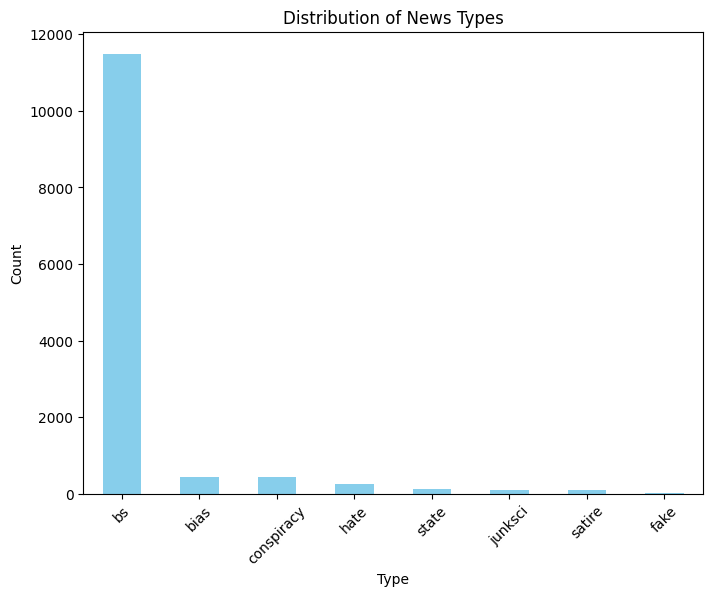

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
df['type'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of News Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


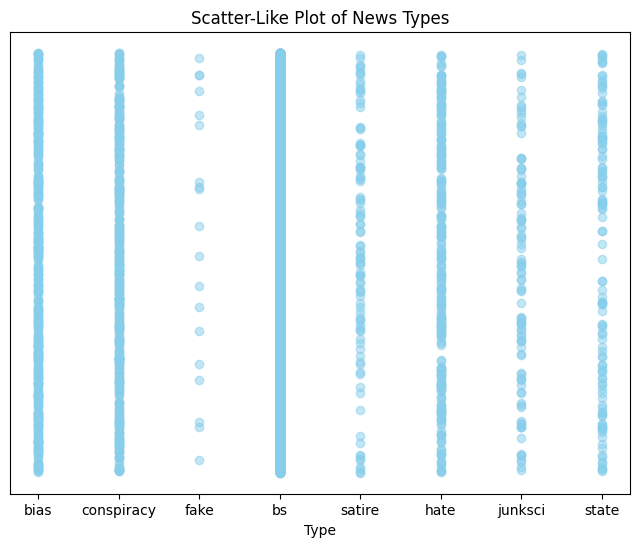

In [9]:
import numpy as np

plt.figure(figsize=(8, 6))
y_jitter = np.random.uniform(-0.1, 0.1, size=len(df))
plt.scatter(df['type'], y_jitter, alpha=0.5, color='skyblue')
plt.title('Scatter-Like Plot of News Types')
plt.xlabel('Type')
plt.yticks([])
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

In [11]:
X = df['text']
y = df['type']

In [12]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [14]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [15]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [51]:
base_learners_boost_bag = [
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
]

In [52]:
meta_learner = LogisticRegression(max_iter=1000)

In [53]:
stacking_boost_bag = StackingClassifier(
    estimators=base_learners_boost_bag,
    final_estimator=meta_learner,
    passthrough=False
)

In [54]:
stacking_boost_bag.fit(X_train_tfidf, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:58:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:05:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:09:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:14:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:18:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

StackingClassifier(estimators=[('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='mlogloss',
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              lea...
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...)),
                               ('rf', RandomForestClassifier(random_state=42))],
                   final_estimator=LogisticRegression(max_iter=1000))

In [55]:
y_pred_stack_boost_bag = stacking_boost_bag.predict(X_test_tfidf)

accuracy_stack_boost_bag = accuracy_score(y_test, y_pred_stack_boost_bag)
print(f'Accuracy of Stacking (XGBoost + RF): {accuracy_stack_boost_bag:.4f}')

Accuracy of Stacking (XGBoost + RF): 0.9274


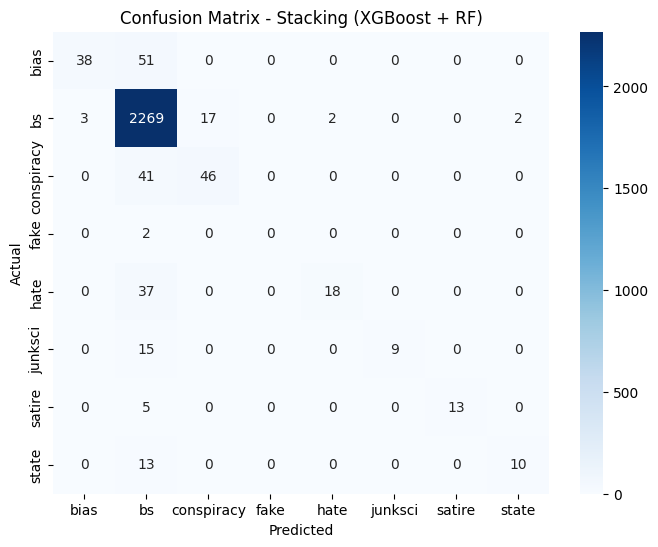

In [56]:
cm_stack_boost_bag = confusion_matrix(y_test, y_pred_stack_boost_bag)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_stack_boost_bag, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix - Stacking (XGBoost + RF)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


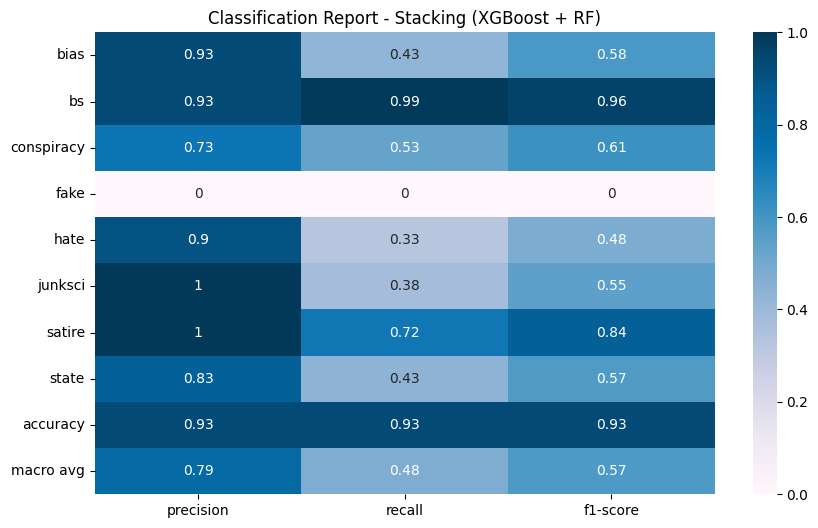

In [57]:
report_stack_boost_bag = classification_report(y_test, y_pred_stack_boost_bag, output_dict=True, target_names=le.classes_)
report_df_stack_boost_bag = pd.DataFrame(report_stack_boost_bag).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(report_df_stack_boost_bag.iloc[:-1, :-1], annot=True, cmap="PuBu")
plt.title("Classification Report - Stacking (XGBoost + RF)")
plt.show()

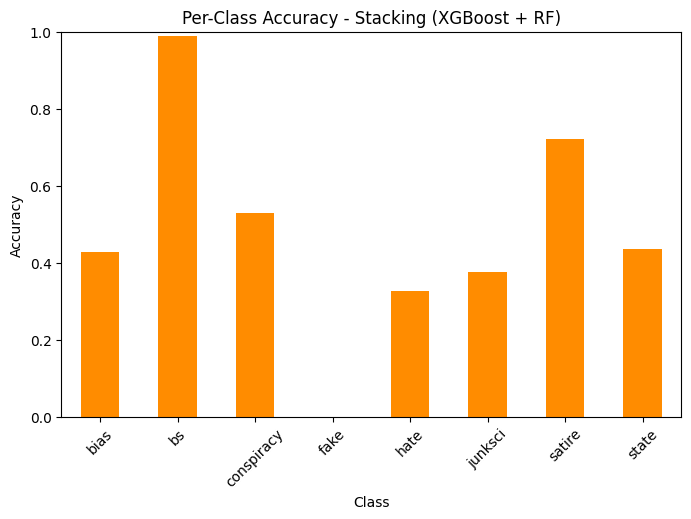

In [58]:
df_test_stack_boost_bag = pd.DataFrame({'true': y_test, 'correct': y_pred_stack_boost_bag == y_test})
class_acc_stack_boost_bag = df_test_stack_boost_bag.groupby('true')['correct'].mean()

plt.figure(figsize=(8, 5))
class_acc_stack_boost_bag.plot(kind='bar', color='darkorange')
plt.title('Per-Class Accuracy - Stacking (XGBoost + RF)')
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.xticks(ticks=range(len(le.classes_)), labels=le.classes_, rotation=45)
plt.ylim(0, 1)
plt.show()

In [59]:
base_learners = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('dt', DecisionTreeClassifier()),
    ('svm', SVC(probability=True))
]

In [60]:
meta_learner = LogisticRegression()

In [61]:
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner)

In [62]:
stacking_model.fit(X_train_tfidf, y_train)

StackingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                               ('dt', DecisionTreeClassifier()),
                               ('svm', SVC(probability=True))],
                   final_estimator=LogisticRegression())

In [63]:
y_pred = stacking_model.predict(X_test_tfidf)

In [64]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Stacking Model: {accuracy:.4f}')

Accuracy of Stacking Model: 0.9143


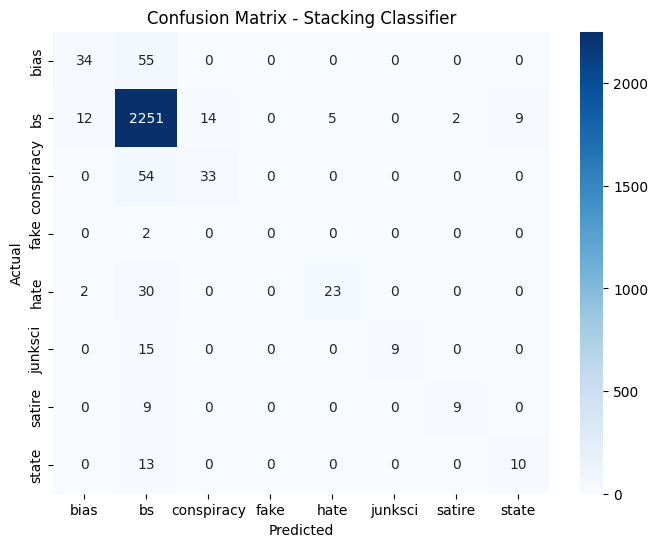

In [65]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix - Stacking Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


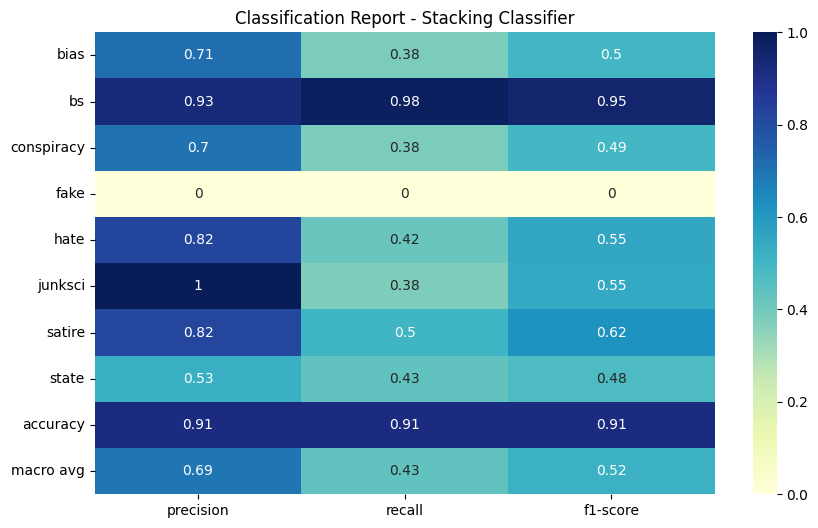

In [66]:
from sklearn.metrics import classification_report
import pandas as pd

report = classification_report(y_test, y_pred, output_dict=True, target_names=le.classes_)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="YlGnBu")
plt.title("Classification Report - Stacking Classifier")
plt.show()

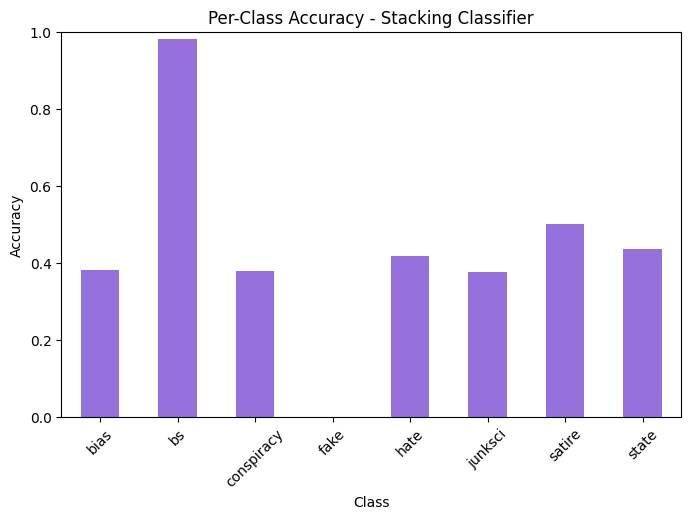

In [67]:
correct_per_class = (y_pred == y_test)
df_test = pd.DataFrame({'true': y_test, 'correct': correct_per_class})
class_acc = df_test.groupby('true')['correct'].mean()

plt.figure(figsize=(8, 5))
class_acc.plot(kind='bar', color='mediumpurple')
plt.title('Per-Class Accuracy - Stacking Classifier')
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.xticks(ticks=range(len(le.classes_)), labels=le.classes_, rotation=45)
plt.ylim(0, 1)
plt.show()

In [19]:
from sklearn.ensemble import AdaBoostClassifier

In [20]:
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(X_train_tfidf, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [21]:
y_pred_ada = ada_model.predict(X_test_tfidf)

accuracy_ada = accuracy_score(y_test, y_pred_ada)
print(f'Accuracy of AdaBoost Classifier: {accuracy_ada:.4f}')

Accuracy of AdaBoost Classifier: 0.8881


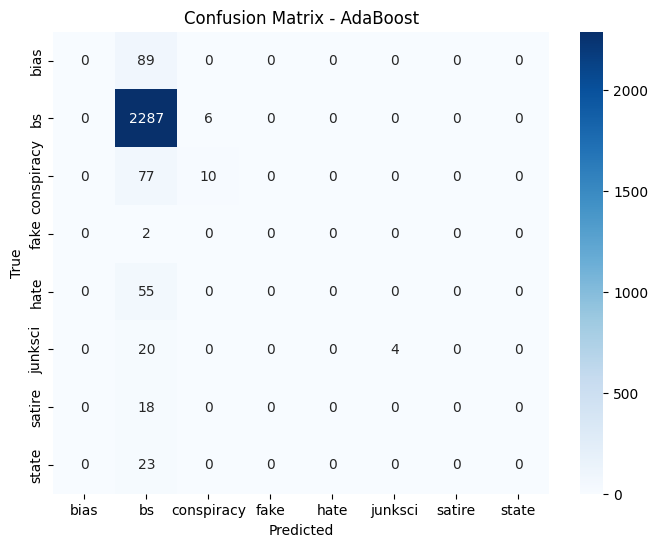

In [26]:
cm_ada = confusion_matrix(y_test, y_pred_ada)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ada, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix - AdaBoost')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


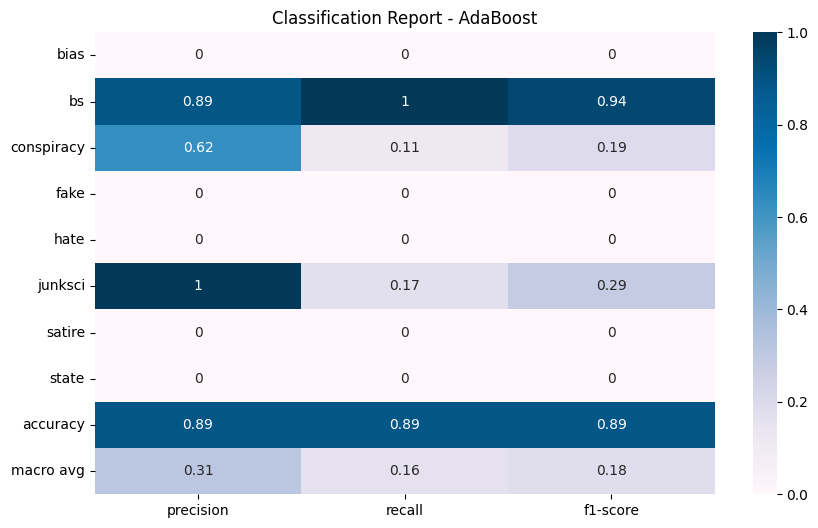

In [27]:
report_ada = classification_report(y_test, y_pred_ada, output_dict=True, target_names=le.classes_)
report_df_ada = pd.DataFrame(report_ada).transpose()
plt.figure(figsize=(10, 6))
sns.heatmap(report_df_ada.iloc[:-1, :-1], annot=True, cmap="PuBu")
plt.title("Classification Report - AdaBoost")
plt.show()

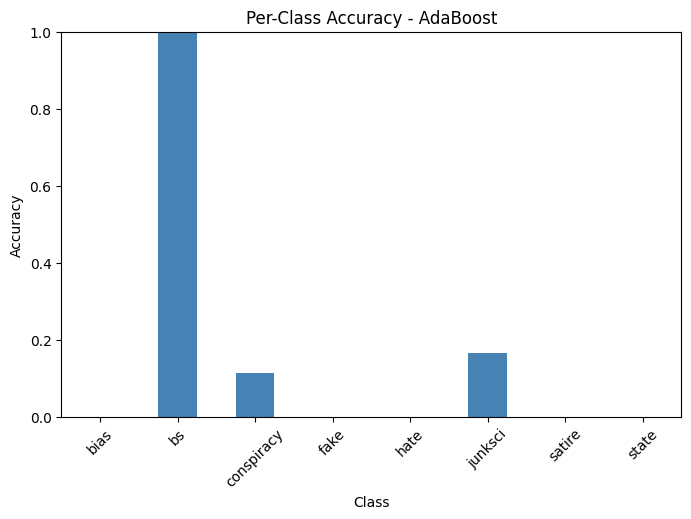

In [28]:
df_test_ada = pd.DataFrame({'true': y_test, 'correct': y_pred_ada == y_test})
class_acc_ada = df_test_ada.groupby('true')['correct'].mean()
plt.figure(figsize=(8, 5))
class_acc_ada.plot(kind='bar', color='steelblue')
plt.title('Per-Class Accuracy - AdaBoost')
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.xticks(ticks=range(len(le.classes_)), labels=le.classes_, rotation=45)
plt.ylim(0, 1)
plt.show()

In [29]:
from xgboost import XGBClassifier

In [30]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train_tfidf, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:27:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [31]:
y_pred_xgb = xgb_model.predict(X_test_tfidf)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'Accuracy of XGBoost Classifier: {accuracy_xgb:.4f}')

Accuracy of XGBoost Classifier: 0.9247


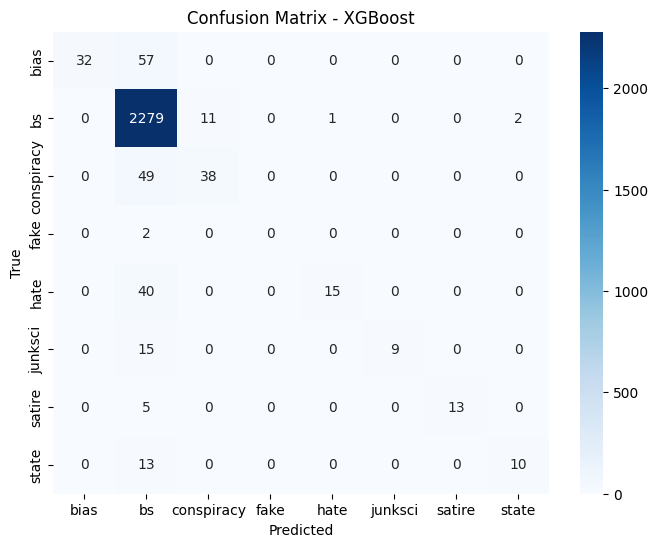

In [32]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


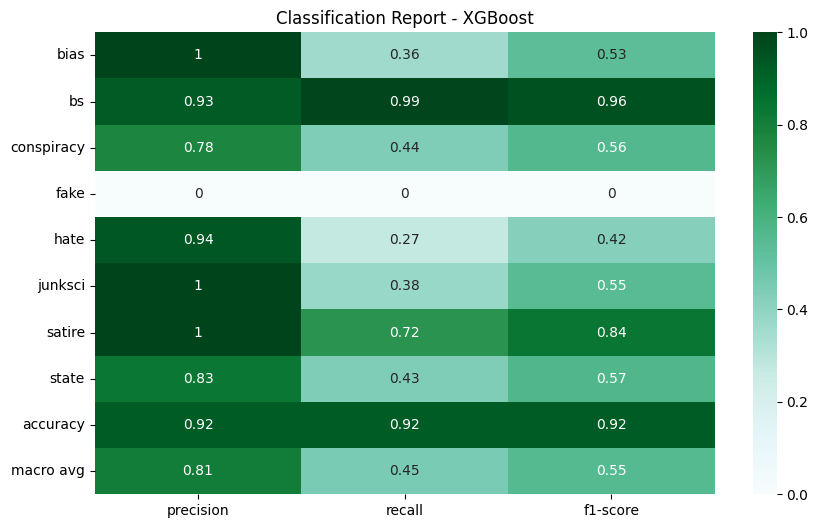

In [33]:
report_xgb = classification_report(y_test, y_pred_xgb, output_dict=True, target_names=le.classes_)
report_df_xgb = pd.DataFrame(report_xgb).transpose()
plt.figure(figsize=(10, 6))
sns.heatmap(report_df_xgb.iloc[:-1, :-1], annot=True, cmap="BuGn")
plt.title("Classification Report - XGBoost")
plt.show()

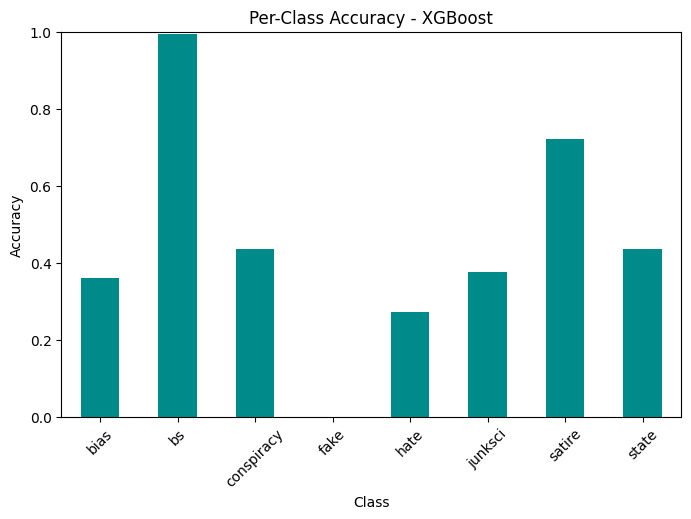

In [34]:
df_test_xgb = pd.DataFrame({'true': y_test, 'correct': y_pred_xgb == y_test})
class_acc_xgb = df_test_xgb.groupby('true')['correct'].mean()
plt.figure(figsize=(8, 5))
class_acc_xgb.plot(kind='bar', color='darkcyan')
plt.title('Per-Class Accuracy - XGBoost')
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.xticks(ticks=range(len(le.classes_)), labels=le.classes_, rotation=45)
plt.ylim(0, 1)
plt.show()

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

In [36]:
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

In [37]:
gb_model.fit(X_train_tfidf, y_train)

GradientBoostingClassifier(random_state=42)

In [38]:
y_pred_gb = gb_model.predict(X_test_tfidf)

In [39]:
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f'Accuracy of Gradient Boosting Classifier: {accuracy_gb:.4f}')

Accuracy of Gradient Boosting Classifier: 0.8954


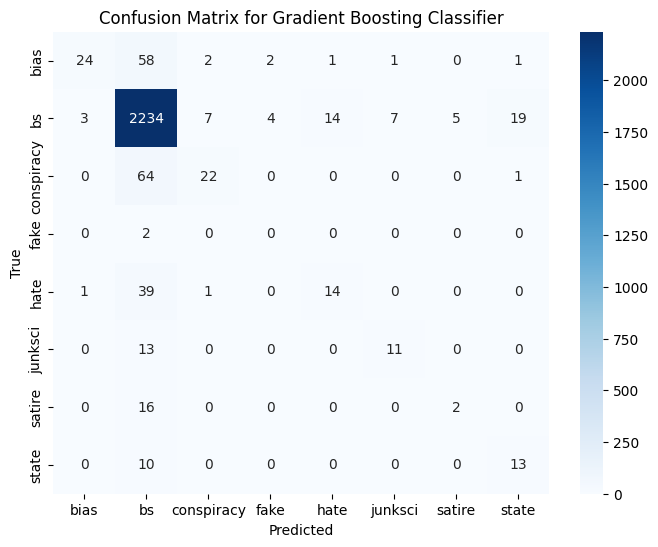

In [40]:
cm_gb = confusion_matrix(y_test, y_pred_gb)

plt.figure(figsize=(8,6))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

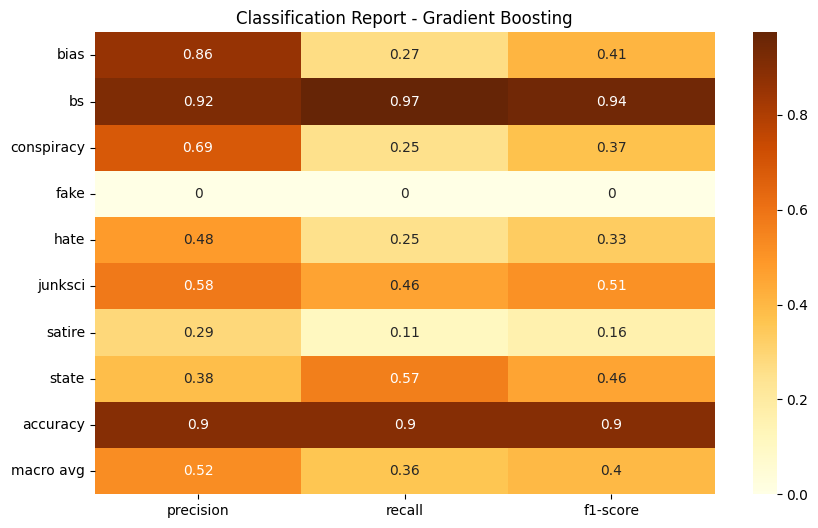

In [41]:
from sklearn.metrics import classification_report
import pandas as pd

report_gb = classification_report(y_test, y_pred_gb, output_dict=True, target_names=le.classes_)
report_df_gb = pd.DataFrame(report_gb).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(report_df_gb.iloc[:-1, :-1], annot=True, cmap="YlOrBr")
plt.title("Classification Report - Gradient Boosting")
plt.show()

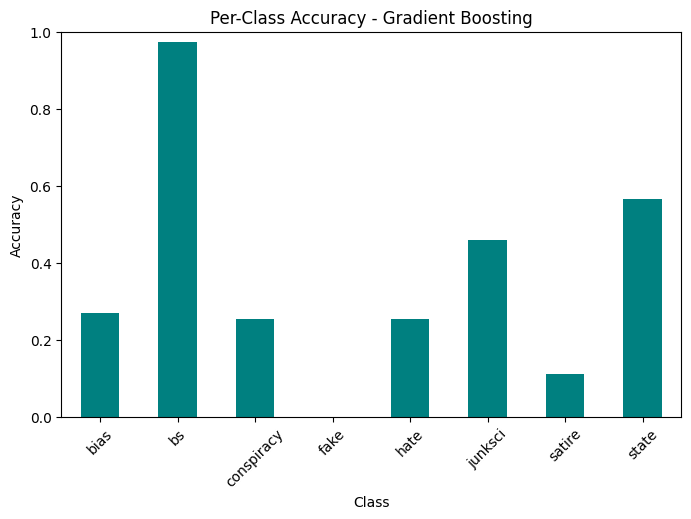

In [42]:
df_test_gb = pd.DataFrame({'true': y_test, 'correct': y_pred_gb == y_test})
class_acc_gb = df_test_gb.groupby('true')['correct'].mean()

plt.figure(figsize=(8, 5))
class_acc_gb.plot(kind='bar', color='teal')
plt.title('Per-Class Accuracy - Gradient Boosting')
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.xticks(ticks=range(len(le.classes_)), labels=le.classes_, rotation=45)
plt.ylim(0, 1)
plt.show()

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [45]:
rf_model.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [46]:
y_pred_rf = rf_model.predict(X_test_tfidf)

In [47]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy of Random Forest Classifier (Bagging): {accuracy_rf:.4f}')

Accuracy of Random Forest Classifier (Bagging): 0.9024


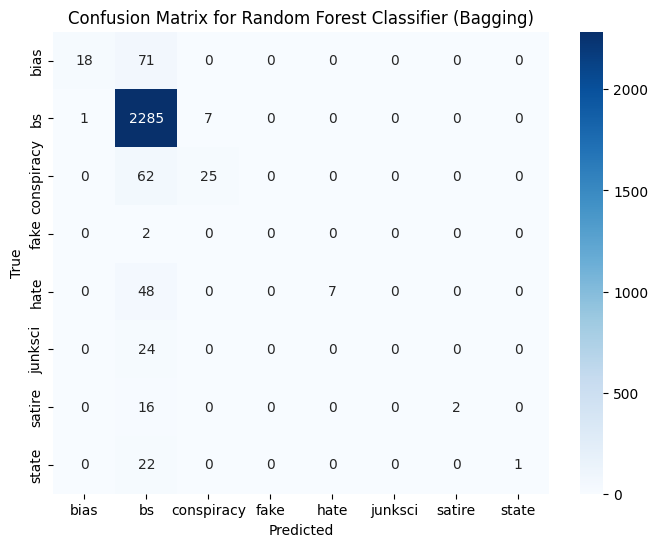

In [48]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8,6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix for Random Forest Classifier (Bagging)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


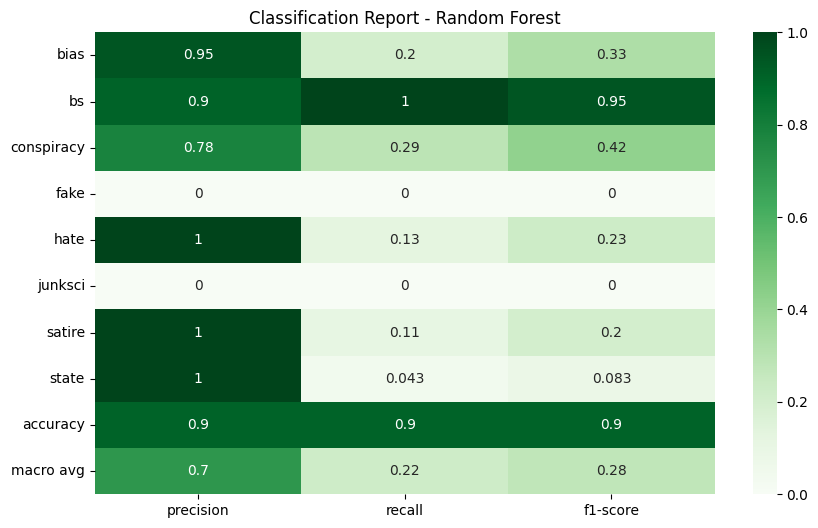

In [49]:
report_rf = classification_report(y_test, y_pred_rf, output_dict=True, target_names=le.classes_)
report_df_rf = pd.DataFrame(report_rf).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(report_df_rf.iloc[:-1, :-1], annot=True, cmap="Greens")
plt.title("Classification Report - Random Forest")
plt.show()

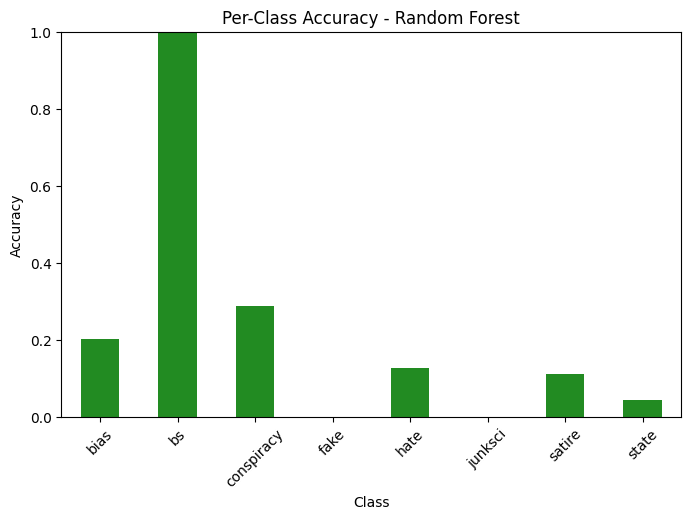

In [50]:
df_test_rf = pd.DataFrame({'true': y_test, 'correct': y_pred_rf == y_test})
class_acc_rf = df_test_rf.groupby('true')['correct'].mean()

plt.figure(figsize=(8, 5))
class_acc_rf.plot(kind='bar', color='forestgreen')
plt.title('Per-Class Accuracy - Random Forest')
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.xticks(ticks=range(len(le.classes_)), labels=le.classes_, rotation=45)
plt.ylim(0, 1)
plt.show()

In [68]:
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score

columns = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
results_df = pd.DataFrame(columns=columns)

report_sb = classification_report(y_test, y_pred_stack_boost_bag, output_dict=True)
stacking_boost_bag_results = {
    "Accuracy": accuracy_stack_boost_bag,
    "Precision": report_sb['macro avg']['precision'],
    "Recall": report_sb['macro avg']['recall'],
    "F1-Score": report_sb['macro avg']['f1-score']
}

results_df.loc['Stacking (XGB + RF)'] = stacking_boost_bag_results

stacking_pred = y_pred
report_stacking = classification_report(y_test, stacking_pred, output_dict=True)
stacking_results = {
    "Accuracy": accuracy_score(y_test, stacking_pred),
    "Precision": report_stacking['macro avg']['precision'],
    "Recall": report_stacking['macro avg']['recall'],
    "F1-Score": report_stacking['macro avg']['f1-score']
}

results_df.loc['Stacking'] = stacking_results

gb_pred = y_pred_gb
report_gb = classification_report(y_test, gb_pred, output_dict=True)
gb_results = {
    "Accuracy": accuracy_score(y_test, gb_pred),
    "Precision": report_gb['macro avg']['precision'],
    "Recall": report_gb['macro avg']['recall'],
    "F1-Score": report_gb['macro avg']['f1-score']
}

results_df.loc['Gradient Boosting'] = gb_results

rf_pred = y_pred_rf
report_rf = classification_report(y_test, rf_pred, output_dict=True)
rf_results = {
    "Accuracy": accuracy_score(y_test, rf_pred),
    "Precision": report_rf['macro avg']['precision'],
    "Recall": report_rf['macro avg']['recall'],
    "F1-Score": report_rf['macro avg']['f1-score']
}

results_df.loc['Random Forest'] = rf_results

report_ada_metrics = classification_report(y_test, y_pred_ada, output_dict=True)
ada_results = {
    "Accuracy": accuracy_score(y_test, y_pred_ada),
    "Precision": report_ada_metrics['macro avg']['precision'],
    "Recall": report_ada_metrics['macro avg']['recall'],
    "F1-Score": report_ada_metrics['macro avg']['f1-score']
}
results_df.loc['AdaBoost'] = ada_results

report_xgb_metrics = classification_report(y_test, y_pred_xgb, output_dict=True)
xgb_results = {
    "Accuracy": accuracy_score(y_test, y_pred_xgb),
    "Precision": report_xgb_metrics['macro avg']['precision'],
    "Recall": report_xgb_metrics['macro avg']['recall'],
    "F1-Score": report_xgb_metrics['macro avg']['f1-score']
}
results_df.loc['XGBoost'] = xgb_results

results_df

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

,Accuracy,Precision,Recall,F1-Score
Stacking (XGB + RF),0.927441,0.790364,0.475564,0.574220
Stacking,0.914319,0.687888,0.433873,0.517356
Gradient Boosting,0.895407,0.523937,0.360752,0.398239
Random Forest,0.902354,0.703973,0.220997,0.276273
AdaBoost,0.888074,0.314317,0.159874,0.177533
XGBoost,0.924739,0.809096,0.449370,0.553106
